In [3]:
import json
import sqlite3
import pandas as pd
# pd.set_option('display.max_rows', 100)

In [4]:
JSON_FILE = "review.json"        
SQLITE_DB = "reviews_sample.db"

In [5]:
conn = sqlite3.connect(SQLITE_DB)
query_tables = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query_tables, conn)
# number of tables in db = 3
tables

,name
0,sqlite_sequence
1,authors
2,hotels
3,reviews


In [6]:
table_name = 'authors'
authors_df = pd.read_sql(f"SELECT * FROM {table_name}", conn)

print(f"Data Shape: Rows: {authors_df.shape[0]}, Columns: {authors_df.shape[1]}")  # (rows, columns)
authors_df.describe()

Data Shape: Rows: 524023, Columns: 8


,author_no,author_num_reviews,author_num_cities,author_num_helpful_votes,author_num_type_reviews
count,524023.000000,523969.000000,357160.000000,386588.000000,273448.000000
mean,262012.000000,11.610378,9.543325,12.302878,10.183724
std,151272.554393,19.744705,10.475232,24.292725,10.837735
min,1.000000,1.000000,2.000000,1.000000,3.000000
25%,131006.500000,1.000000,3.000000,2.000000,4.000000
50%,262012.000000,4.000000,6.000000,5.000000,7.000000
75%,393017.500000,14.000000,12.000000,13.000000,12.000000
max,524023.000000,935.000000,284.000000,964.000000,330.000000


In [7]:
# just to see how data looks like
print(f"pre-cleaning - Rows: {len(authors_df)}")
authors_df.tail(30)

pre-cleaning - Rows: 524023


,author_no,author_id,author_name,author_location,author_num_reviews,author_num_cities,author_num_helpful_votes,author_num_type_reviews
523993,523994,33A67B4E7BE6FCB424443A9B0BFF5092,emanuelelan,,6.0,5.0,NaN,NaN
523994,523995,3289BAB92143000EF7A7FD53F27F081D,Moefra,"Reggio Emilia, Italy",1.0,NaN,NaN,NaN
523995,523996,AB4D79AEB76DB5ABF44C83FEA5725F52,Giovanna_JL,"Roma, Italia",15.0,8.0,2.0,3.0
523996,523997,579AE775B45DC0FA61DB8F50B44DE421,hqyap,"Osaka, Japan",1.0,NaN,NaN,NaN
523997,523998,F27DC487CC30FEF8282757C7766EB894,Claudio71,Macerata,19.0,16.0,6.0,8.0
523998,523999,AEB751B93867C601C484E71D24949CE8,Alberto F,,1.0,NaN,1.0,NaN
523999,524000,BA6DDA3ACBA092798716CA95398238ED,Sissiundfranz,,11.0,10.0,2.0,8.0
524000,524001,F114FB8FD81F6EF8308F5D3E24A67A0D,kent991230,kobe,1.0,NaN,NaN,NaN
524001,524002,9946721D7459D75DF238FE6E01A3DF51,absolute_girl,"Montreal, Canada",8.0,7.0,7.0,7.0
524002,524003,1E47A5870989B58AB2FFAF61A5B6B40E,Docdodo,"Besana in Brianza, Italy",87.0,33.0,26.0,25.0


In [8]:
sorted_dupe_authors = authors_df[authors_df.duplicated(subset=['author_id'], keep=False)].sort_values(by='author_id')
print(f"Number of duplicate rows:\t{len(sorted_dupe_authors)}")

full_names_before = set(authors_df['author_name'].unique())

duped_names_before = set(sorted_dupe_authors['author_name'].unique())
print(f"Unique names from authors before clean:{len(full_names_before)}")
print(f"Unique names from duplicates before clean:{len(duped_names_before)}")

sorted_dupe_authors[0:10]
# sorted_dupe_authors[0:100]
# sorted_dupe_authors[101:200]
# sorted_dupe_authors[201:300]
# sorted_dupe_authors[sorted_dupe_authors['author_name'] == 'Daniel B']
# sorted_dupe_authors[sorted_dupe_authors['author_name'] == 'niki16']
# sorted_dupe_authors[sorted_dupe_authors['author_name'] == 'Bellwmu']




Number of duplicate rows:	2062
Unique names from authors before clean:483346
Unique names from duplicates before clean:1120


,author_no,author_id,author_name,author_location,author_num_reviews,author_num_cities,author_num_helpful_votes,author_num_type_reviews
25106,25107,000F77670B2244A4A131ED2CCFAF1414,Tenley,"washington, dc",28.0,12.0,20.0,10.0
405913,405914,000F77670B2244A4A131ED2CCFAF1414,Tenley,"washington, dc",28.0,12.0,21.0,10.0
86993,86994,0042497C37852E3FF33EE4162E6FC6BB,Honu_Ohana,"Washington DC, District of Columbia",156.0,72.0,465.0,42.0
214549,214550,0042497C37852E3FF33EE4162E6FC6BB,Honu_Ohana,"Washington DC, District of Columbia",156.0,72.0,466.0,42.0
93373,93374,00BBAC3339F576E164FF9F627489481C,das_ubersoldat,"Hamburg, Germany",88.0,44.0,35.0,49.0
236650,236651,00BBAC3339F576E164FF9F627489481C,das_ubersoldat,"Hamburg, Germany",88.0,44.0,36.0,49.0
132799,132800,00C237DD2D98F4761FB58BFF1E7975F9,Chris_Sykes,Johannesburg,25.0,12.0,23.0,10.0
166099,166100,00C237DD2D98F4761FB58BFF1E7975F9,Chris_Sykes,Johannesburg,25.0,12.0,24.0,10.0
415348,415349,00CEBBB10220FB499BD56A270DE44C01,GeeDubya,"Maine, USA",30.0,23.0,21.0,17.0
437590,437591,00CEBBB10220FB499BD56A270DE44C01,GeeDubya,"Maine, USA",31.0,24.0,21.0,18.0


In [9]:
'''
LOGIC
This is another unique case where two author id has different name, we will merge based off same 
'''
sorted_dupe_authors[sorted_dupe_authors['author_id'] == '1B27A5219983ACC4A0269FAF6F7E20C5']

,author_no,author_id,author_name,author_location,author_num_reviews,author_num_cities,author_num_helpful_votes,author_num_type_reviews
162807,162808,1B27A5219983ACC4A0269FAF6F7E20C5,niki16,"Ann Arbor, MI",23.0,14.0,14.0,12.0
425516,425517,1B27A5219983ACC4A0269FAF6F7E20C5,Bellwmu,"Ann Arbor, MI",23.0,14.0,14.0,12.0


In [10]:
'''
LOGIC
Removing duplicates for author's table, can see above code. Observed that author_name is duplicated but author_no is unique. The logic
is assumed that a higher author no (eg: 25107 vs 405914) has 405914 to be a more recent record. We can remove the duplicates 
following the below heuristic (earliest takes higher priority)

1. Completeness of author_num_reviews, author_num_cities, author_num_helpful_votes, author_num_type_reviews
    Rows with 4/4 valid columns come first
2. Higher author_no == newer data, come first

- if there are 2 duplicate rows, see "sorted_dupe_authors[sorted_dupe_authors['author_name'] == 'Daniel B']"
    we will prioritise the earlier record that has lesser NaN values
'''

cols_to_check = ['author_num_reviews', 'author_num_cities', 'author_num_helpful_votes', 'author_num_type_reviews']
authors_df['completeness_score'] = authors_df[cols_to_check].notna().sum(axis=1)

authors_df = authors_df.sort_values(by=['completeness_score', 'author_no'], ascending=[False, False])

authors_deduped = authors_df.drop_duplicates(subset=['author_id'], keep='first')
authors_deduped = authors_deduped.drop(columns=['completeness_score']).reset_index(drop=True)

names_after = set(authors_deduped['author_name'].unique())

print(f"Unique names after: {len(names_after)}")
print(f"Original count: {len(authors_df)}")
print(f"Cleaned count: {len(authors_deduped)}")
authors_deduped.head()

Unique names after: 483164
Original count: 524023
Cleaned count: 522889


,author_no,author_id,author_name,author_location,author_num_reviews,author_num_cities,author_num_helpful_votes,author_num_type_reviews
0,524018,372E83E5CC6D5C9D4B803C37AC7A32D1,sofia2000,Emilia Romagna,10.0,8.0,6.0,7.0
1,524017,8C0A5D7AAAC626F189C01058F464A47E,MIssBeaker,"Hamburg, Germany",6.0,5.0,3.0,5.0
2,524016,7B2BF2CBA618F5EF57ABD77B8BCB5DF7,JamesD1975,Germany,17.0,12.0,3.0,8.0
3,524015,707465F74FC1695FCB60DB75D3354948,Loukoume,"Paris, France",15.0,8.0,7.0,8.0
4,524014,F97F67FB925EA7BAA61EBE4FADFEA85B,thegarlicheads,,7.0,7.0,2.0,6.0


In [11]:
# sanity check to ensure no duplicated author_id
sorted_dupe_author_id = authors_deduped[authors_deduped.duplicated(subset=['author_id'], keep=False)].sort_values(by='author_id')
print(len(sorted_dupe_author_id))

0


In [12]:
# sanity check to ensure no duplicated author_id
sorted_dupe_author_no = authors_deduped[authors_deduped.duplicated(subset=['author_no'], keep=False)].sort_values(by='author_no')
print(len(sorted_dupe_author_no))

0


In [13]:
# ISSUE: duplicated author_names
sorted_dupe_author_name = authors_deduped[authors_deduped.duplicated(subset=['author_name'], keep=False)].sort_values(by='author_name')
print(len(sorted_dupe_author_name))

49899


In [14]:
# CHECK: same name but location differs

from IPython.display import display

name_counts = authors_deduped['author_name'].value_counts()
duplicate_names = name_counts[name_counts > 1].index

print(len(duplicate_names))

# adjust the split range duplicated_names[x] to see specific entry and duplicated_names[1:10] to see a few examples
common_name = duplicate_names[1:2]
for c in common_name:
    print(f"Duplicates for name: {c}") 
    
    entries = authors_deduped[authors_deduped['author_name'] == c]
    display(entries[['author_id', 'author_name', 'author_location', 'author_num_reviews', 'author_num_cities', 'author_num_helpful_votes', 'author_num_type_reviews']].head(20))

# OBSERVATION: we assume that the name is duplicated but author_location is unique. That means they are actually different customers
# we can also observe the author_num_reviews, author_num_cities, author_num_helpful_votes, author_num_type_reviews are not very similar
# TODO: should we clean location to countries only?


10174
Duplicates for name: David B


,author_id,author_name,author_location,author_num_reviews,author_num_cities,author_num_helpful_votes,author_num_type_reviews
15911,CC08AFD28033FB780AD1D32EBA0E4980,David B,"Columbus, Ohio",26.0,10.0,15.0,6.0
17684,62630A1D0714FEF90C4CD0F38368D657,David B,"Huddersfield, United Kingdom",25.0,13.0,8.0,9.0
21692,833AE3396D8D0B2B114186DF8DD9F103,David B,"New York City, New York",14.0,5.0,7.0,3.0
48108,EAD2FB887C71DD2C62B18185CE12A20D,David B,"Fort Myers, Florida",6.0,6.0,5.0,6.0
49123,8729A8290B01E3767637A0505936101B,David B,Indianapo,3.0,3.0,1.0,3.0
66796,37720149867226EE0A300A3F6A45B937,David B,"Montgomery, Alabama",10.0,5.0,4.0,4.0
70769,12565BD91DEB2B0FC0AF15A14028AD1C,David B,"Atlanta, Georgia",4.0,4.0,5.0,4.0
95050,A6183369278DAEF37748B1F0E5ACB52A,David B,"Fort Worth, Texas",12.0,3.0,3.0,3.0
111050,70CAB47D53DCA2BBAC69E9F99812044C,David B,"Blacksburg, VA",18.0,17.0,18.0,18.0
115504,A54C244741654674EAE6890FA5CA9A25,David B,Chicago,41.0,21.0,12.0,13.0


In [15]:
print(f"Original Data Shape: \t\t Rows: {authors_df.shape[0]}, Columns: {authors_df.shape[1]}")  # (rows, columns)
authors_df.describe()

print(f"Data Shape after Deduped: \t Rows: {authors_deduped.shape[0]}, Columns: {authors_deduped.shape[1]}")  # (rows, columns)
authors_deduped.describe()
authors_df.head()

Original Data Shape: 		 Rows: 524023, Columns: 9
Data Shape after Deduped: 	 Rows: 522889, Columns: 8


,author_no,author_id,author_name,author_location,author_num_reviews,author_num_cities,author_num_helpful_votes,author_num_type_reviews,completeness_score
524017,524018,372E83E5CC6D5C9D4B803C37AC7A32D1,sofia2000,Emilia Romagna,10.0,8.0,6.0,7.0,4
524016,524017,8C0A5D7AAAC626F189C01058F464A47E,MIssBeaker,"Hamburg, Germany",6.0,5.0,3.0,5.0,4
524015,524016,7B2BF2CBA618F5EF57ABD77B8BCB5DF7,JamesD1975,Germany,17.0,12.0,3.0,8.0,4
524014,524015,707465F74FC1695FCB60DB75D3354948,Loukoume,"Paris, France",15.0,8.0,7.0,8.0,4
524013,524014,F97F67FB925EA7BAA61EBE4FADFEA85B,thegarlicheads,,7.0,7.0,2.0,6.0,4


In [16]:
authors_deduped.head()

,author_no,author_id,author_name,author_location,author_num_reviews,author_num_cities,author_num_helpful_votes,author_num_type_reviews
0,524018,372E83E5CC6D5C9D4B803C37AC7A32D1,sofia2000,Emilia Romagna,10.0,8.0,6.0,7.0
1,524017,8C0A5D7AAAC626F189C01058F464A47E,MIssBeaker,"Hamburg, Germany",6.0,5.0,3.0,5.0
2,524016,7B2BF2CBA618F5EF57ABD77B8BCB5DF7,JamesD1975,Germany,17.0,12.0,3.0,8.0
3,524015,707465F74FC1695FCB60DB75D3354948,Loukoume,"Paris, France",15.0,8.0,7.0,8.0
4,524014,F97F67FB925EA7BAA61EBE4FADFEA85B,thegarlicheads,,7.0,7.0,2.0,6.0


In [17]:
# CLEAN: replace NaN with 0 
cols_to_fix = ['author_num_reviews', 'author_num_cities', 'author_num_helpful_votes', 'author_num_type_reviews']
authors_deduped[cols_to_fix] = authors_deduped[cols_to_fix].fillna(0)

# CLEAN: replace floats with integers
authors_deduped[cols_to_fix] = authors_deduped[cols_to_fix].astype(int)

print("Verification check for null")
print(authors_deduped[cols_to_fix].isnull().sum())
print()
print("Verification check for datatype")
print(authors_deduped[cols_to_fix].dtypes)
authors_deduped.head()

Verification check for null
author_num_reviews          0
author_num_cities           0
author_num_helpful_votes    0
author_num_type_reviews     0
dtype: int64

Verification check for datatype
author_num_reviews          int64
author_num_cities           int64
author_num_helpful_votes    int64
author_num_type_reviews     int64
dtype: object


,author_no,author_id,author_name,author_location,author_num_reviews,author_num_cities,author_num_helpful_votes,author_num_type_reviews
0,524018,372E83E5CC6D5C9D4B803C37AC7A32D1,sofia2000,Emilia Romagna,10,8,6,7
1,524017,8C0A5D7AAAC626F189C01058F464A47E,MIssBeaker,"Hamburg, Germany",6,5,3,5
2,524016,7B2BF2CBA618F5EF57ABD77B8BCB5DF7,JamesD1975,Germany,17,12,3,8
3,524015,707465F74FC1695FCB60DB75D3354948,Loukoume,"Paris, France",15,8,7,8
4,524014,F97F67FB925EA7BAA61EBE4FADFEA85B,thegarlicheads,,7,7,2,6


In [18]:
# TODO: are we happy with this state? i think author_location can be improved, separate them to two columns, state and country

In [19]:
# Skipping hotels as its kinda straight forward, moving to reviews

table_name = 'reviews'
reviews_df = pd.read_sql(f"SELECT * FROM {table_name}", conn)

print(f"Data Shape: Rows: {reviews_df.shape[0]}, Columns: {reviews_df.shape[1]}")  # (rows, columns)
reviews_df.describe()

Data Shape: Rows: 754798, Columns: 17


,id,offering_id,overall,service,cleanliness,value,location_rating,sleep_quality,rooms,via_mobile,author_num_helpful_votes
count,7.547980e+05,7.547980e+05,754798.000000,678988.000000,675828.000000,672564.000000,618335.000000,500903.000000,621374.000000,754798.000000,565929.000000
mean,9.950837e+07,3.298562e+05,3.983358,4.106388,4.242606,3.924407,4.429534,4.114891,3.953896,0.061358,17.850237
std,4.080908e+07,4.658640e+05,1.127822,1.161039,1.052190,1.161233,0.878539,1.112003,1.129833,0.239986,35.424673
min,1.167680e+07,7.257200e+04,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,6.864660e+07,9.095700e+04,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,0.000000,3.000000
50%,1.174592e+08,1.114410e+05,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,0.000000,7.000000
75%,1.309165e+08,2.587050e+05,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,19.000000
max,1.478017e+08,3.574675e+06,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,964.000000


In [20]:
# ISSUE: why is authors all NOne?
print(reviews_df.isnull().mean())
reviews_df.head()

id                          0.000000
author_no                   1.000000
author_id                   0.000000
offering_id                 0.000000
overall                     0.000000
service                     0.100437
cleanliness                 0.104624
value                       0.108948
location_rating             0.180794
sleep_quality               0.336375
rooms                       0.176768
title                       0.000000
text                        0.000000
review_date                 0.000000
date_stayed                 0.050264
via_mobile                  0.000000
author_num_helpful_votes    0.250225
dtype: float64


,id,author_no,author_id,offering_id,overall,service,cleanliness,value,location_rating,sleep_quality,rooms,title,text,review_date,date_stayed,via_mobile,author_num_helpful_votes
0,11676795,None,1BC33D747AFD41207DDF1B30389F2D06,93466,5.0,4.0,4.0,3.0,4.0,NaN,4.0,“It was great!”,At check in the staff were very nice and offer...,2007-12-25 00:00:00,December 2007,0,10.0
1,11703779,None,2E16868E5A8347E563556F0691E0CF20,83489,1.0,1.0,3.0,1.0,3.0,NaN,2.0,“I wouldn't recommend this one...”,A friend and I stayed at this hotel for a rece...,2007-12-20 00:00:00,December 2007,0,1.0
2,11704360,None,6A157001884A4B2AB61F56F785F8B3F9,119601,5.0,5.0,5.0,5.0,5.0,NaN,5.0,“So Quiet! So Friendly!”,"Our stay was so quiet, we were very surprised!...",2007-12-20 00:00:00,November 2007,0,3.0
3,11705348,None,E8754ED06F958B342C00B1AD33884360,126257,3.0,3.0,4.0,5.0,5.0,NaN,2.0,“Great location - decent BUDGET hotel”,The location is superb. \nJust a few blocks aw...,2007-12-20 00:00:00,December 2007,0,35.0
4,11705477,None,8445910D017299B5414EF873A2E4ED57,99365,1.0,NaN,NaN,NaN,NaN,NaN,NaN,“Housekeepers steal!”,Do not stay at this hotel!!! I had my ipod sto...,2007-12-20 00:00:00,December 2007,0,1.0


In [21]:
# Remove hour,min,sec in review_date
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'])

# align date_stayed format with review_date, default to 1 by pandas
reviews_df['date_stayed'] = pd.to_datetime(reviews_df['date_stayed'], format='%B %Y', errors='coerce')
print("Rows with invalid review dates:", reviews_df['review_date'].isnull().sum())
print("Rows with invalid stay dates:", reviews_df['date_stayed'].isnull().sum())
reviews_df.head()
reviews_df[['review_date', 'date_stayed']].head()

Rows with invalid review dates: 0
Rows with invalid stay dates: 37971


,review_date,date_stayed
0,2007-12-25,2007-12-01
1,2007-12-20,2007-12-01
2,2007-12-20,2007-11-01
3,2007-12-20,2007-12-01
4,2007-12-20,2007-12-01


In [22]:
# ISSUE - there are approx 38k rows with stay dates that are null
# Proposed - since reviews are made after stay, accounting for 2 case
    # 1. reviews are made same month as stay_date
    # 2. reviews are made after the month of stay date

valid_dates = reviews_df.dropna(subset=['date_stayed', 'review_date']).copy()

stay_period = valid_dates['date_stayed'].dt.to_period('M')
review_period = valid_dates['review_date'].dt.to_period('M')

month_diff = (review_period - stay_period).apply(lambda x: x.n)

valid_dates['same_month'] = (month_diff == 0) 
valid_dates['month_after'] = (month_diff == 0) | (month_diff == 1)

same_match_rate = valid_dates['same_month'].mean()
next_match_rate = valid_dates['month_after'].mean()
print(f"Percentage of reviews made in same month of stay: {same_match_rate:.2%}")
print(f"Percentage of reviews made within 1 month of stay: {next_match_rate:.2%}")


Percentage of reviews made in same month of stay: 59.94%
Percentage of reviews made within 1 month of stay: 84.18%


In [23]:
# replace the null values of stay dates with month and year of review dates
reviews_df['stay_date_is_guessed'] = reviews_df['date_stayed'].isnull().astype(int)
reviews_df['date_stayed'] = reviews_df['date_stayed'].fillna(reviews_df['review_date'].dt.to_period('M').dt.to_timestamp())

print(f"Remaining nulls in date_stayed: {reviews_df['date_stayed'].isnull().sum()}")
reviews_df[['review_date', 'date_stayed', 'stay_date_is_guessed']].head()
reviews_df.head()

Remaining nulls in date_stayed: 0


,id,author_no,author_id,offering_id,overall,service,cleanliness,value,location_rating,sleep_quality,rooms,title,text,review_date,date_stayed,via_mobile,author_num_helpful_votes,stay_date_is_guessed
0,11676795,None,1BC33D747AFD41207DDF1B30389F2D06,93466,5.0,4.0,4.0,3.0,4.0,NaN,4.0,“It was great!”,At check in the staff were very nice and offer...,2007-12-25,2007-12-01,0,10.0,0
1,11703779,None,2E16868E5A8347E563556F0691E0CF20,83489,1.0,1.0,3.0,1.0,3.0,NaN,2.0,“I wouldn't recommend this one...”,A friend and I stayed at this hotel for a rece...,2007-12-20,2007-12-01,0,1.0,0
2,11704360,None,6A157001884A4B2AB61F56F785F8B3F9,119601,5.0,5.0,5.0,5.0,5.0,NaN,5.0,“So Quiet! So Friendly!”,"Our stay was so quiet, we were very surprised!...",2007-12-20,2007-11-01,0,3.0,0
3,11705348,None,E8754ED06F958B342C00B1AD33884360,126257,3.0,3.0,4.0,5.0,5.0,NaN,2.0,“Great location - decent BUDGET hotel”,The location is superb. \nJust a few blocks aw...,2007-12-20,2007-12-01,0,35.0,0
4,11705477,None,8445910D017299B5414EF873A2E4ED57,99365,1.0,NaN,NaN,NaN,NaN,NaN,NaN,“Housekeepers steal!”,Do not stay at this hotel!!! I had my ipod sto...,2007-12-20,2007-12-01,0,1.0,0


In [24]:
#check if rating are all ending with .0
reviews_df.describe()

,id,offering_id,overall,service,cleanliness,value,location_rating,sleep_quality,rooms,review_date,date_stayed,via_mobile,author_num_helpful_votes,stay_date_is_guessed
count,7.547980e+05,7.547980e+05,754798.000000,678988.000000,675828.000000,672564.000000,618335.000000,500903.000000,621374.000000,754798,754798,754798.000000,565929.000000,754798.000000
mean,9.950837e+07,3.298562e+05,3.983358,4.106388,4.242606,3.924407,4.429534,4.114891,3.953896,2011-04-23 22:28:43.635727,2011-03-04 16:57:55.392357,0.061358,17.850237,0.050306
min,1.167680e+07,7.257200e+04,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2007-12-20 00:00:00,2003-01-01 00:00:00,0.000000,1.000000,0.000000
25%,6.864660e+07,9.095700e+04,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,2010-06-23 00:00:00,2010-05-01 00:00:00,0.000000,3.000000,0.000000
50%,1.174592e+08,1.114410e+05,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,2011-08-29 00:00:00,2011-07-01 00:00:00,0.000000,7.000000,0.000000
75%,1.309165e+08,2.587050e+05,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2012-05-28 00:00:00,2012-04-01 00:00:00,0.000000,19.000000,0.000000
max,1.478017e+08,3.574675e+06,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2012-12-20 00:00:00,2012-12-01 00:00:00,1.000000,964.000000,1.000000
std,4.080908e+07,4.658640e+05,1.127822,1.161039,1.052190,1.161233,0.878539,1.112003,1.129833,NaN,NaN,0.239986,35.424673,0.218576


In [25]:
# ISSUE: there are missing values for subratings such as service, cleanliness, value, location_rating, sleep_quality
# check the correlation to overall, in cases where users dont bother to rate the subratings, we can
# consider to fallback to overall to fill up

rating_cols = ['overall', 'service', 'cleanliness', 'value', 'location_rating', 'sleep_quality', 'rooms']
correlation = reviews_df[rating_cols].corr()
print("Correlation with Overall Rating before fillna:")
print(correlation['overall'].sort_values(ascending=False))

missing_pct = reviews_df[rating_cols].isnull().mean() * 100
print("\nPercentage of Missing Values before fillna:")
print(missing_pct)

print("\nOverall Rating Distribution:")
print(reviews_df['overall'].value_counts().sort_index())

Correlation with Overall Rating before fillna:
overall            1.000000
rooms              0.822360
service            0.801199
value              0.789629
cleanliness        0.772096
sleep_quality      0.755958
location_rating    0.524129
Name: overall, dtype: float64

Percentage of Missing Values before fillna:
overall             0.000000
service            10.043747
cleanliness        10.462402
value              10.894835
location_rating    18.079407
sleep_quality      33.637477
rooms              17.676782
dtype: float64

Overall Rating Distribution:
overall
0.0        17
1.0     39960
2.0     46515
3.0    106954
4.0    253981
5.0    307371
Name: count, dtype: int64


In [26]:
sub_ratings = ['service', 'cleanliness', 'value', 'location_rating', 'sleep_quality', 'rooms']

# fill nan for subratings with nan
for col in sub_ratings:
    reviews_df[col] = reviews_df[col].fillna(reviews_df['overall'])
correlation = reviews_df[rating_cols].corr()
print("Correlation with Overall Rating after fillna:")
print(correlation['overall'].sort_values(ascending=False))

missing_pct = reviews_df[rating_cols].isnull().mean() * 100
print("\nPercentage of Missing Values after fillna:")
print(missing_pct)

print("\nOverall Rating Distribution:")
print(reviews_df['overall'].value_counts().sort_index())

Correlation with Overall Rating after fillna:
overall            1.000000
rooms              0.855657
sleep_quality      0.848126
service            0.822091
value              0.813219
cleanliness        0.798766
location_rating    0.622169
Name: overall, dtype: float64

Percentage of Missing Values after fillna:
overall            0.0
service            0.0
cleanliness        0.0
value              0.0
location_rating    0.0
sleep_quality      0.0
rooms              0.0
dtype: float64

Overall Rating Distribution:
overall
0.0        17
1.0     39960
2.0     46515
3.0    106954
4.0    253981
5.0    307371
Name: count, dtype: int64


In [27]:
reviews_df.head()

,id,author_no,author_id,offering_id,overall,service,cleanliness,value,location_rating,sleep_quality,rooms,title,text,review_date,date_stayed,via_mobile,author_num_helpful_votes,stay_date_is_guessed
0,11676795,None,1BC33D747AFD41207DDF1B30389F2D06,93466,5.0,4.0,4.0,3.0,4.0,5.0,4.0,“It was great!”,At check in the staff were very nice and offer...,2007-12-25,2007-12-01,0,10.0,0
1,11703779,None,2E16868E5A8347E563556F0691E0CF20,83489,1.0,1.0,3.0,1.0,3.0,1.0,2.0,“I wouldn't recommend this one...”,A friend and I stayed at this hotel for a rece...,2007-12-20,2007-12-01,0,1.0,0
2,11704360,None,6A157001884A4B2AB61F56F785F8B3F9,119601,5.0,5.0,5.0,5.0,5.0,5.0,5.0,“So Quiet! So Friendly!”,"Our stay was so quiet, we were very surprised!...",2007-12-20,2007-11-01,0,3.0,0
3,11705348,None,E8754ED06F958B342C00B1AD33884360,126257,3.0,3.0,4.0,5.0,5.0,3.0,2.0,“Great location - decent BUDGET hotel”,The location is superb. \nJust a few blocks aw...,2007-12-20,2007-12-01,0,35.0,0
4,11705477,None,8445910D017299B5414EF873A2E4ED57,99365,1.0,1.0,1.0,1.0,1.0,1.0,1.0,“Housekeepers steal!”,Do not stay at this hotel!!! I had my ipod sto...,2007-12-20,2007-12-01,0,1.0,0


In [28]:
# ratings should be integers instead of float
rating_cols = ['overall'] + sub_ratings
reviews_df[rating_cols] = reviews_df[rating_cols].astype(int)

# author_num_helpful_votes should also be integers
reviews_df['author_num_helpful_votes'] = reviews_df['author_num_helpful_votes'].fillna(0)
reviews_df['author_num_helpful_votes'] = reviews_df['author_num_helpful_votes'].astype(int)
reviews_df.head(100)

# drop author_no, 
none_count = reviews_df['author_no'].isna().sum()
print(f"Number of rows where author_no is None: {none_count}")
none_pct = reviews_df['author_no'].isna().mean() * 100
print(f"Percentage of missing data: {none_pct:.2f}%")

cols_to_drop = ['author_no']
reviews_df = reviews_df.drop(columns=cols_to_drop)

reviews_df.head(20)

Number of rows where author_no is None: 754798
Percentage of missing data: 100.00%


,id,author_id,offering_id,overall,service,cleanliness,value,location_rating,sleep_quality,rooms,title,text,review_date,date_stayed,via_mobile,author_num_helpful_votes,stay_date_is_guessed
0,11676795,1BC33D747AFD41207DDF1B30389F2D06,93466,5,4,4,3,4,5,4,“It was great!”,At check in the staff were very nice and offer...,2007-12-25,2007-12-01,0,10,0
1,11703779,2E16868E5A8347E563556F0691E0CF20,83489,1,1,3,1,3,1,2,“I wouldn't recommend this one...”,A friend and I stayed at this hotel for a rece...,2007-12-20,2007-12-01,0,1,0
2,11704360,6A157001884A4B2AB61F56F785F8B3F9,119601,5,5,5,5,5,5,5,“So Quiet! So Friendly!”,"Our stay was so quiet, we were very surprised!...",2007-12-20,2007-11-01,0,3,0
3,11705348,E8754ED06F958B342C00B1AD33884360,126257,3,3,4,5,5,3,2,“Great location - decent BUDGET hotel”,The location is superb. \nJust a few blocks aw...,2007-12-20,2007-12-01,0,35,0
4,11705477,8445910D017299B5414EF873A2E4ED57,99365,1,1,1,1,1,1,1,“Housekeepers steal!”,Do not stay at this hotel!!! I had my ipod sto...,2007-12-20,2007-12-01,0,1,0
5,11705512,8BD4F6B6A98072A8204A54479C453877,111501,1,3,2,1,5,1,3,“Not what it used to be - AT ALL!”,My husband and I stayed at the Palmer House fo...,2007-12-20,2007-11-01,0,71,0
6,11705523,D90A84AEA4BEBCA3F795FCB895A647AE,81192,4,5,5,5,4,4,5,“loved the parc 55. perfect”,Stayed in Parc 55 for 5 night from 26 nov and ...,2007-12-20,2007-11-01,0,41,0
7,11705535,00458CC8A87D86666C5234C7D5F54585,99333,5,5,5,5,5,5,4,"“Perfect location - clean, friendly”",This hotel was in a perfect location for us - ...,2007-12-20,2007-12-01,0,0,0
8,11705560,4E2A1834014A5B90C0D8BA2D01FAFD9F,99392,4,4,4,4,4,4,4,“Nice Hotel”,We picked this hotel with location and price i...,2007-12-20,2007-09-01,0,10,0
9,11705702,7013A59467026C6A6AEBC406B7428DF5,93520,4,4,4,4,4,4,4,“A good hotel”,My sister and I stayed at the Park Central for...,2007-12-20,2007-12-01,0,10,0


In [29]:
none_count = reviews_df['author_id'].isna().sum()
print(none_count)

0


In [30]:
# TODO: check for duplicates reviews
subset_cols = ['author_id', 'offering_id', 'text']

logical_dupes = reviews_df[reviews_df.duplicated(subset=subset_cols, keep=False)]
print(f"Number of duplicate reviews (same author + hotel + text): {len(logical_dupes)}")

logical_dupes.sort_values(by=['author_id', 'offering_id']).head(20)

Number of duplicate reviews (same author + hotel + text): 1550


,id,author_id,offering_id,overall,service,cleanliness,value,location_rating,sleep_quality,rooms,title,text,review_date,date_stayed,via_mobile,author_num_helpful_votes,stay_date_is_guessed
381960,117732772,,73706,5,5,5,5,5,5,5,“Hôtel proche de l'aéroport”,Très bon hôtel pour y passer une nuit. Situé p...,2011-09-04,2011-09-01,0,0,1
632450,136646923,,73706,5,5,5,5,5,5,5,“Hôtel proche de l'aéroport”,Très bon hôtel pour y passer une nuit. Situé p...,2011-09-04,2011-09-01,0,0,1
419566,119818377,,73889,4,4,4,4,4,4,4,“hotel Days inn”,Le personnel est très gentil et pour les perso...,2011-10-26,2011-10-01,0,0,1
632434,136645264,,73889,4,4,4,4,4,4,4,“hotel Days inn”,Le personnel est très gentil et pour les perso...,2011-10-26,2011-10-01,0,0,1
148896,55294833,,75711,5,5,5,5,5,5,5,“Hôtel Best Western Time Square”,"Hôtel très bien placé, à 5mn à pied de Time Sq...",2010-02-04,2010-02-01,0,0,1
157920,58693094,,75711,3,3,3,3,3,3,3,“Hotel à Times Square”,Hotel confortable remis en état mais chambre t...,2010-03-13,2010-03-01,0,0,1
174987,64258277,,75711,3,3,3,3,3,3,3,“Best western president hotel: Time Square”,Les plus:\nDecoration originale\nEmplacement i...,2010-05-13,2010-05-01,0,0,1
177140,65033976,,75711,5,5,5,5,5,5,5,“Best Western times Square : idéalement situé”,"Hôtel sympa, visiblement relooké, et c'est plu...",2010-05-21,2010-05-01,0,0,1
317368,111924867,,75711,4,4,4,4,4,4,4,“Situation idéale à deux pas de Times Square”,"Hotel jouissant d'une situation idéale, accuei...",2011-06-05,2011-06-01,0,0,1
633185,136674512,,75711,3,3,3,3,3,3,3,“Hotel à Times Square”,Hotel confortable remis en état mais chambre t...,2010-03-13,2010-03-01,0,0,1


In [ ]:
# merge author & review
merged_df = pd.merge(
    reviews_df, 
    authors_deduped, 
    on='author_id', 
    how='inner'
)

print("Actual columns in merged_df:", merged_df.columns.tolist())

Actual columns in merged_df: ['id', 'author_id', 'offering_id', 'overall', 'service', 'cleanliness', 'value', 'location_rating', 'sleep_quality', 'rooms', 'title', 'text', 'review_date', 'date_stayed', 'via_mobile', 'author_num_helpful_votes_x', 'stay_date_is_guessed', 'author_no', 'author_name', 'author_location', 'author_num_reviews', 'author_num_cities', 'author_num_helpful_votes_y', 'author_num_type_reviews']


In [36]:
# feature engineering
merged_df['text_length'] = merged_df['text'].str.len().fillna(0)

merged_df['helpful_ratio'] = (
    merged_df['author_num_helpful_votes_y'] / 
    merged_df['author_num_reviews'].replace(0, 1)
)

avg_overall = merged_df['overall'].mean()
merged_df['rating_deviation'] = (merged_df['overall'] - avg_overall).abs()

# final feature selected
clustering_features = [
    'overall', 'service', 'cleanliness', 'value', 'location_rating', 
    'sleep_quality', 'rooms', 'text_length', 'author_num_reviews', 'helpful_ratio'
]
print(f"Feature set ready. Rows: {len(merged_df)}")
print(f"Merged Data Shape: {merged_df.shape}")
merged_df[clustering_features].head()

Feature set ready. Rows: 754798
Merged Data Shape: (754798, 27)


,overall,service,cleanliness,value,location_rating,sleep_quality,rooms,text_length,author_num_reviews,helpful_ratio
0,5,4,4,3,4,5,4,358,9,1.111111
1,1,1,3,1,3,1,2,3184,2,0.500000
2,5,5,5,5,5,5,5,1308,1,3.000000
3,3,3,4,5,5,3,2,775,63,0.555556
4,1,1,1,1,1,1,1,383,1,1.000000


In [43]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# scaling and sampling

# 1. Sampling for performance
df_sample = merged_df.sample(n=30000, random_state=42).copy()
X = df_sample[clustering_features].fillna(0)

# 2. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

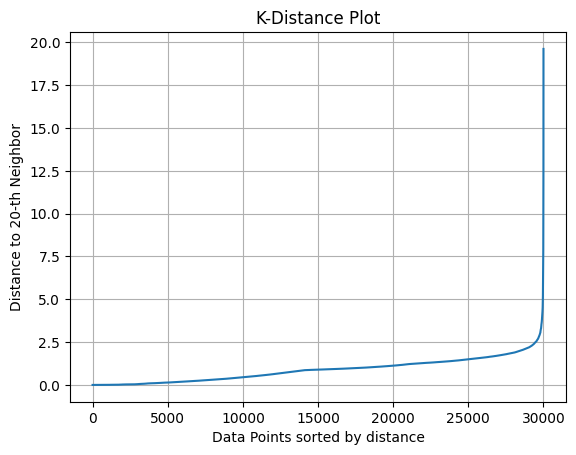

In [50]:
k = 2 * len(clustering_features)
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort the distances to the k-th neighbor
k_distances = np.sort(distances[:, k-1], axis=0)

# Plotting 
plt.plot(k_distances)
plt.title('K-Distance Plot')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'Distance to {k}-th Neighbor')
plt.grid(True)

# Observed that the elbow of the curve sharp upwards at about 2.5, eps can be set at 2.5 

In [44]:
# DBScan
dbscan = DBSCAN(eps=2.5, min_samples=20)

# fitting
clusters = dbscan.fit_predict(X_scaled)
df_sample['cluster'] = clusters

# distribution check
print("Cluster distribution:")
print(df_sample['cluster'].value_counts())

Cluster distribution:
cluster
 0    29818
-1      182
Name: count, dtype: int64


In [ ]:
profile = df_sample.groupby('cluster')[clustering_features].mean()
profile['count'] = df_sample['cluster'].value_counts()
print("\nCluster Profiles (Averages):")
display(profile)

# OBSERVATION -1 cluster have a lower overall score at 2.7, higher author_num_reviews, a higher helpful_ratio and form a lower count over total
# -1 as elite reviewers and 0 as casual reviewers


Cluster Profiles (Averages):


,overall,service,cleanliness,value,location_rating,sleep_quality,rooms,text_length,author_num_reviews,helpful_ratio,count
cluster,,,,,,,,,,,
-1,2.719780,2.664835,3.351648,2.763736,3.708791,2.917582,2.945055,3001.247253,111.016484,4.386030,182
0,3.983567,4.082400,4.209135,3.913039,4.342981,4.032799,3.950533,763.149473,16.352874,0.723141,29818


In [46]:
 # PCA to reduce dimensionality
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# reduce to 2D
pca = PCA(n_components=2)
pca_results = pca.fit_transform(X_scaled)

df_sample['pca_one'] = pca_results[:, 0]
df_sample['pca_two'] = pca_results[:, 1]

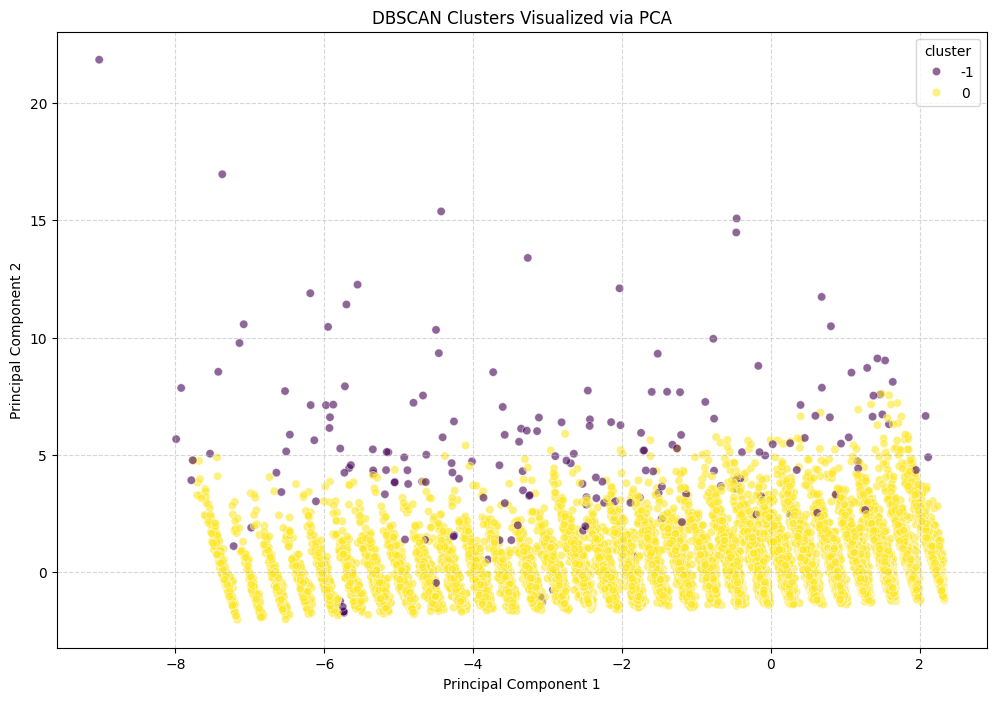

In [49]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="pca_one", y="pca_two",
    hue="cluster",
    palette="viridis",
    data=df_sample,
    legend="full",
    alpha=0.6
)

plt.title('DBSCAN Clusters Visualized via PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.5)

Reviewers are segmented to two main categories, first is the minority(cluster -1) categorised as Elite Reviewers and majority(cluster 0) as Casual Reviewers.  

Business use case  
1. Higher impact content ranking - Prioritize reviews from minority for reviews listing on webpage
2. Prioritization for low reviews - Alert managers when reviewer from Cluster -1 concludes a lower score